In [1]:
import requests
import json

api_key = "6eed7eabfeadf7e13784e1afec29ed52"
url = "http://ws.audioscrobbler.com/2.0/"   #?method=chart.gettoptags"

method = "chart.gettoptags"
params = {
    "method": method,
    "api_key": api_key,
    "format": "json"
}

tags = requests.get(url, params=params)
tags_json = tags.json()
print(tags.url)

http://ws.audioscrobbler.com/2.0/?method=chart.gettoptags&api_key=6eed7eabfeadf7e13784e1afec29ed52&format=json


In [2]:
tags_response = tags_json["tags"]["tag"]
tags_response

[{'name': 'rock',
  'url': 'https://www.last.fm/tag/rock',
  'reach': '394676',
  'taggings': '3965297',
  'streamable': '1',
  'wiki': {}},
 {'name': 'electronic',
  'url': 'https://www.last.fm/tag/electronic',
  'reach': '253057',
  'taggings': '2354576',
  'streamable': '1',
  'wiki': {}},
 {'name': 'seen live',
  'url': 'https://www.last.fm/tag/seen+live',
  'reach': '81678',
  'taggings': '2137591',
  'streamable': '1',
  'wiki': {}},
 {'name': 'alternative',
  'url': 'https://www.last.fm/tag/alternative',
  'reach': '261148',
  'taggings': '2092825',
  'streamable': '1',
  'wiki': {}},
 {'name': 'indie',
  'url': 'https://www.last.fm/tag/indie',
  'reach': '252609',
  'taggings': '2012769',
  'streamable': '1',
  'wiki': {}},
 {'name': 'pop',
  'url': 'https://www.last.fm/tag/pop',
  'reach': '224703',
  'taggings': '1962214',
  'streamable': '1',
  'wiki': {}},
 {'name': 'female vocalists',
  'url': 'https://www.last.fm/tag/female+vocalists',
  'reach': '167679',
  'taggings': '

In [7]:
import pandas as pd

tags_response_df = pd.DataFrame(tags_response)
tags_response_df.head()

,name,reach,streamable,taggings,url,wiki
0,rock,394676,1,3965297,https://www.last.fm/tag/rock,{}
1,electronic,253057,1,2354576,https://www.last.fm/tag/electronic,{}
2,seen live,81678,1,2137591,https://www.last.fm/tag/seen+live,{}
3,alternative,261148,1,2092825,https://www.last.fm/tag/alternative,{}
4,indie,252609,1,2012769,https://www.last.fm/tag/indie,{}


In [4]:
tags_response_df.to_csv("top_genre_tags.csv", encoding="utf-8", index=False, header=True)

In [9]:
top_tags = tags_response_df.head(5)
top_tags

,name,reach,streamable,taggings,url,wiki
0,rock,394676,1,3965297,https://www.last.fm/tag/rock,{}
1,electronic,253057,1,2354576,https://www.last.fm/tag/electronic,{}
2,seen live,81678,1,2137591,https://www.last.fm/tag/seen+live,{}
3,alternative,261148,1,2092825,https://www.last.fm/tag/alternative,{}
4,indie,252609,1,2012769,https://www.last.fm/tag/indie,{}


In [18]:
top_tags.dtypes

name          object
reach         object
streamable    object
taggings      object
url           object
wiki          object
dtype: object

In [22]:
values = top_tags["taggings"].astype(str).astype(int)
values

0    3965297
1    2354576
2    2137591
3    2092825
4    2012769
Name: taggings, dtype: int32

<IPython.core.display.Javascript object>


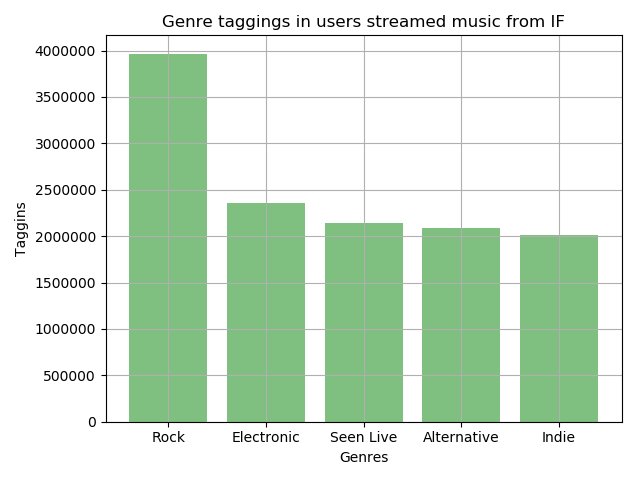

In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

tags = values
x_axis = np.arange(len(tags))
plt.bar(x_axis, tags, color="g", alpha=0.5, align="center")
plt.title("Genre taggings in users streamed music from IF")
plt.xlabel("Genres")
plt.ylabel("Taggins")
tick_values = [value for value in x_axis]
plt.xticks(tick_values, ["Rock", "Electronic", "Seen Live", "Alternative", "Indie"])
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
plt.savefig("Top_genre_tags")